In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
# 데이터를 읽어온다.
train_df = pd.read_csv('data/spaceship_train4.csv')
test_df = pd.read_csv('data/spaceship_test4.csv')

In [3]:
# train 데이터를 복제한다.
train_df2 = train_df.copy()

In [4]:
train_df2['HomePlanet'] = train_df2['HomePlanet'].factorize()[0]
train_df2['CryoSleep'] = train_df2['CryoSleep'].factorize()[0]
train_df2['Destination'] = train_df2['Destination'].factorize()[0]
train_df2['VIP'] = train_df2['VIP'].factorize()[0]
train_df2['CabinDeck'] = train_df2['CabinDeck'].factorize()[0]
train_df2['CabinSide'] = train_df2['CabinSide'].factorize()[0]
train_df2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,9280,3,5
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,2,1,1,1,1,9280,4,6
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,3,1,2,1,2,9280,7,1
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,3,2,2,1,2,2135,7,5
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,4,1,1,1,1,9280,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0.0,9276,1,2,0,1,9280,3,3
8689,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,9278,1,3,1,1,9280,5,7
8690,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1.0,9279,1,3,1,1,9280,8,7
8691,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0.0,9280,1,4,1,2,9280,7,4


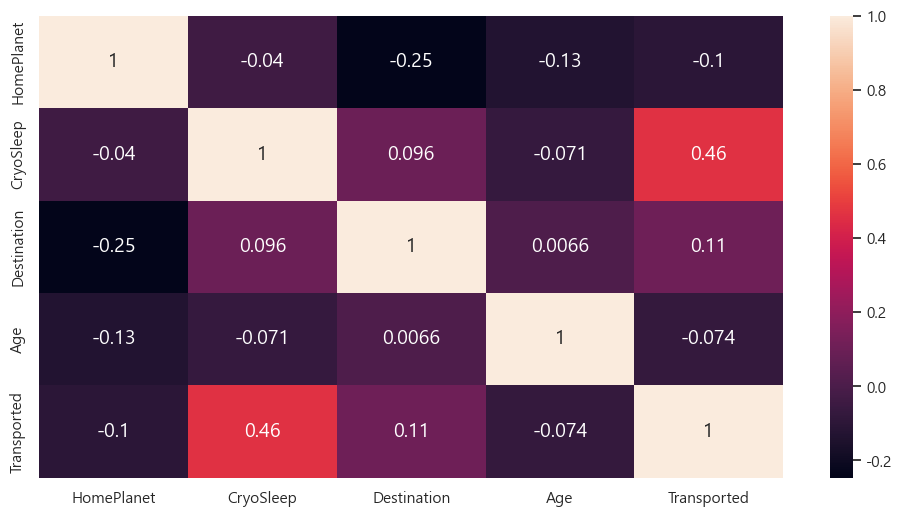

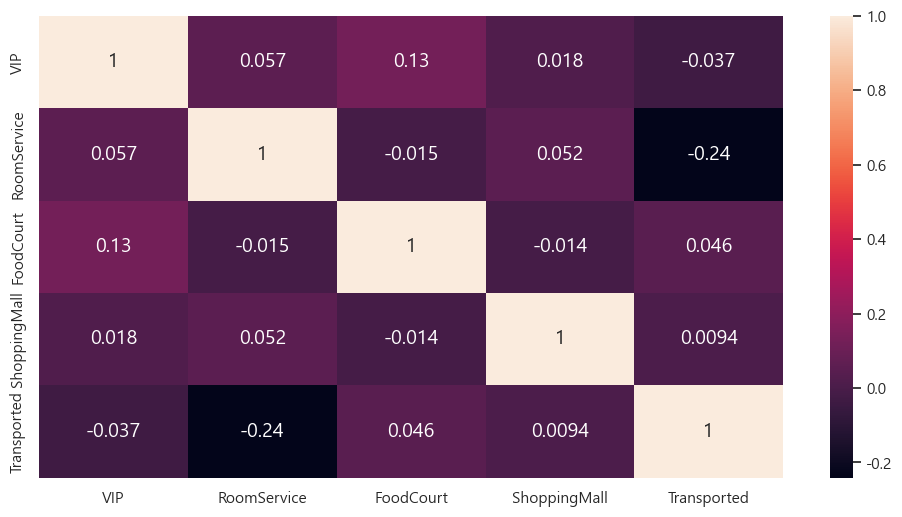

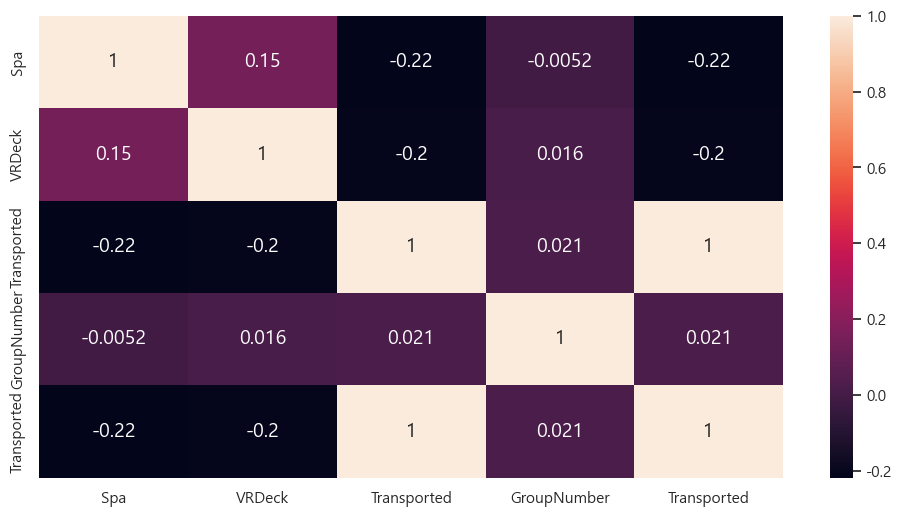

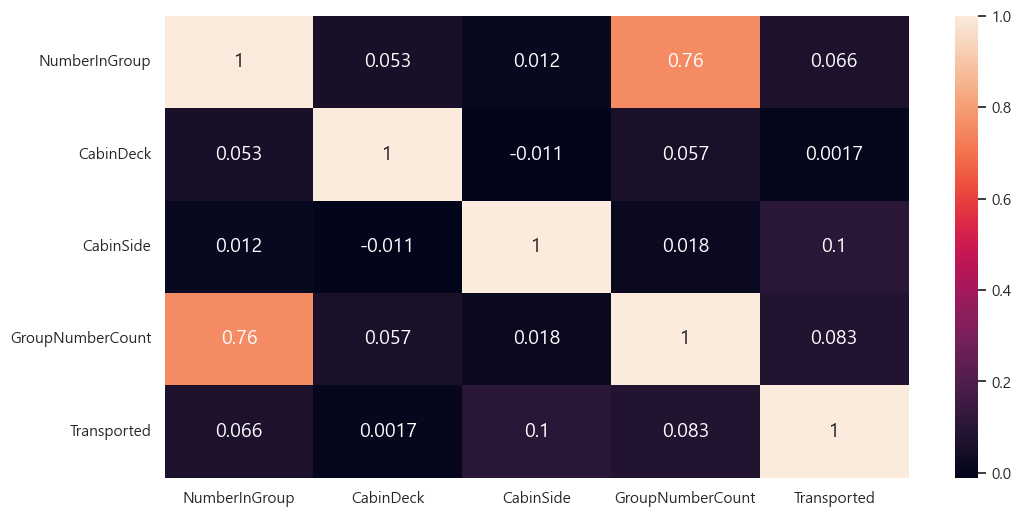

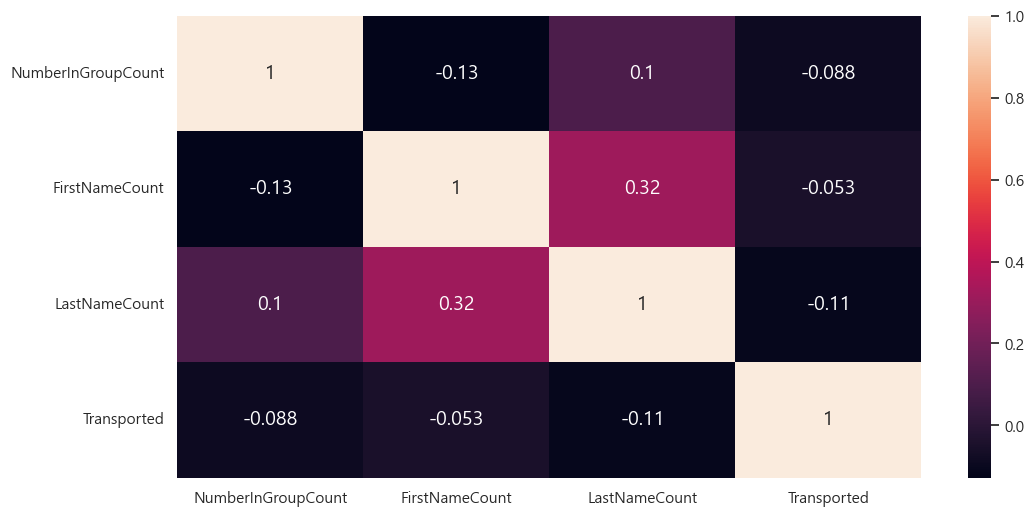

In [5]:
# 상관계수 확인
a1 = train_df2[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'Transported']]
a2 = a1.corr()
sns.heatmap(a2, annot=True)
plt.show()

a1 = train_df2[['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Transported']]
a2 = a1.corr()
sns.heatmap(a2, annot=True)
plt.show()

a1 = train_df2[['Spa', 'VRDeck', 'Transported', 'GroupNumber', 'Transported']]
a2 = a1.corr()
sns.heatmap(a2, annot=True)
plt.show()

a1 = train_df2[['NumberInGroup', 'CabinDeck', 'CabinSide', 'GroupNumberCount', 'Transported']]
a2 = a1.corr()
sns.heatmap(a2, annot=True)
plt.show()

a1 = train_df2[['NumberInGroupCount', 'FirstNameCount', 'LastNameCount', 'Transported']]
a2 = a1.corr()
sns.heatmap(a2, annot=True)
plt.show()

In [6]:
a1 = train_df2.corr()['Transported']
a2 = abs(a1)
a2.sort_values(inplace=True, ascending=False)
a2

Transported           1.000000
CryoSleep             0.460132
RoomService           0.241124
Spa                   0.218545
VRDeck                0.204874
LastNameCount         0.111722
Destination           0.108152
HomePlanet            0.102240
CabinSide             0.101397
NumberInGroupCount    0.088410
GroupNumberCount      0.082644
Age                   0.074249
NumberInGroup         0.066390
FirstNameCount        0.052706
FoodCourt             0.045583
VIP                   0.037261
GroupNumber           0.021491
ShoppingMall          0.009391
CabinDeck             0.001746
Name: Transported, dtype: float64

In [7]:
# 위의 상관 계수를 메모해두세요~~

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# vif 표를 출력한 후 vif 계수가 높다고 생각되는 컬럼들을 추가하여 계속 돌려보요요
# vif_X = train_df2.drop(['Transported'], axis=1)
vif_X = train_df2.drop(['Transported', 'NumberInGroup'], axis=1)
# vif를 계산하기 위해 상수항을 추가한다.
vif_X2 = sm.add_constant(vif_X)
# vif를 계산한다.
vif = pd.DataFrame()
vif['변수'] = vif_X2.columns
vif['VIF'] = [variance_inflation_factor(vif_X2.values, i) for i in range(vif_X2.shape[1])]
vif

,변수,VIF
0,const,42.921881
1,HomePlanet,1.377426
2,CryoSleep,1.309252
3,Destination,1.081902
4,Age,1.106836
5,VIP,1.041957
6,RoomService,1.134124
7,FoodCourt,1.242229
8,ShoppingMall,1.063180
9,Spa,1.138058


In [9]:
# NumberInGroup 컬럼은 제거한다.
train_df.drop('NumberInGroup', axis=1, inplace=True)
test_df.drop('NumberInGroup', axis=1, inplace=True)

display(train_df)
display(test_df)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,B,P,1,9280,3,5
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,2,F,S,1,9280,4,6
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,3,A,S,2,9280,7,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,3,A,S,2,2135,7,5
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,4,F,S,1,9280,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0.0,9276,A,P,1,9280,3,3
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,9278,G,S,1,9280,5,7
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1.0,9279,G,S,1,9280,8,7
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0.0,9280,E,S,2,9280,7,4


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNumber,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,13,G,S,1,9280,8,12
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,18,F,S,1,9280,4,9
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,19,C,S,1,9280,6,3
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,21,C,S,1,9280,2,5
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,23,F,S,1,9280,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,9266,G,S,2,2135,10,6
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,9269,F,S,1,9280,6,5
4274,Mars,True,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,9271,D,P,1,9280,4,6
4275,Europa,False,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,9273,D,P,1,9280,7,3


In [10]:
train_df.to_csv('data/spaceship_train5.csv', index=False)
test_df.to_csv('data/spaceship_test5.csv', index=False)

In [11]:
train_df2 = pd.read_csv('data/spaceship_train5.csv')
test_df2 = pd.read_csv('data/spaceship_test5.csv')
display(train_df2)
display(test_df2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,B,P,1,9280,3,5
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,2,F,S,1,9280,4,6
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,3,A,S,2,9280,7,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,3,A,S,2,2135,7,5
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,4,F,S,1,9280,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0.0,9276,A,P,1,9280,3,3
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,9278,G,S,1,9280,5,7
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1.0,9279,G,S,1,9280,8,7
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0.0,9280,E,S,2,9280,7,4


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNumber,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,13,G,S,1,9280,8,12
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,18,F,S,1,9280,4,9
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,19,C,S,1,9280,6,3
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,21,C,S,1,9280,2,5
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,23,F,S,1,9280,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,9266,G,S,2,2135,10,6
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,9269,F,S,1,9280,6,5
4274,Mars,True,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,9271,D,P,1,9280,4,6
4275,Europa,False,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,9273,D,P,1,9280,7,3
